In [ ]:
# Script to scrape weekly breakthrough covid-19 case count from mass.gov pdfs

In [1]:
import numpy as np
from bs4 import BeautifulSoup
import io
import requests
from PyPDF2 import PdfFileReader
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# read ma.gov website with archive of covid data
url = 'https://www.mass.gov/info-details/archive-of-covid-19-vaccination-reports#october-2021-'

response = requests.get(url)
content = response.content
soup = BeautifulSoup(content, "html.parser")

In [3]:
# find relevant part of the html
head = soup.head.title.text
body = soup.find_all("body")
section = body[0].find_all("section")

In [4]:
# get all of the links pertaining to breakthrough case data
all_links = []

for s in np.arange(4, len(section)-3):
    links = section[s].find_all('a', href=True)
    for l in np.arange(len(links)):
        if "individuals" in links[l]['href']:
            all_links.append('https://www.mass.gov' + links[l]['href'])

num_dates = len(all_links)            
all_links

['https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-october-19-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-october-12-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-october-5-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-september-28-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-september-21-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-september-14-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-september-7-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-august-31-2021/download',
 'https://www.mass.gov/doc/weekly-report-covid-19-cases-in-vaccinated-individuals-august-24-2021/download']

In [5]:
# pull dates from the link titles and store as datetime instead of string
date_str = [all_links[l].split('/')[4].replace('weekly-report-covid-19-cases-in-vaccinated-individuals-', '') for l in np.arange(num_dates)]
Date_str = [date_str[i].capitalize() for i in np.arange(num_dates)]
date = [datetime.strptime(Date_str[i], '%B-%d-%Y') for i in np.arange(num_dates)]

['2021-10-19',
 '2021-10-12',
 '2021-10-05',
 '2021-09-28',
 '2021-09-21',
 '2021-09-14',
 '2021-09-07',
 '2021-08-31',
 '2021-08-24']

In [6]:
# function to open the pdfs associated with the above links and extract the weekly breakthrough case count
def read_doc(pdf_path):
    
    pdf_link = requests.get(pdf_path)

    with io.BytesIO(pdf_link.content) as f:
        
        pdf = PdfFileReader(f)
        info = pdf.getDocumentInfo()
        page_obj = pdf.getPage(1)
        text = page_obj.extractText()
            
        if (text.split('\n')[1] == '-Decisional') and (text.split('\n')[3] == '-19 Cases '):
            cases_str = text.split('\n')[6]
            
        elif (text.split('\n')[1] == '-Decisional'):
            cases_str = text.split('\n')[5]
        
        else:
            cases_str = text.split('\n')[3]
        
        cases = int(cases_str.replace(',', ''))

    return cases

In [7]:
# call function for each link
all_cases = []
for i in np.arange(len(all_links)):
    cases = read_doc(all_links[i])
    print(cases)
    all_cases.append(cases)

47929
44498
40464
36723
32345
27777
23858
19443
15739


Text(0, 0.5, 'case count')

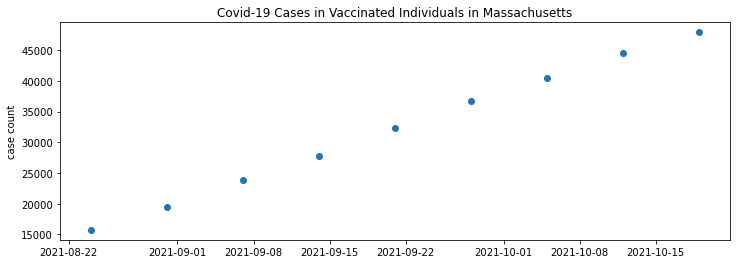

In [13]:
plt.figure(figsize=(12,4))
plt.scatter(date, all_cases)
plt.title('Covid-19 Cases in Vaccinated Individuals in Massachusetts')
plt.ylabel('case count')